# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [115]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

from yellowbrick.utils import KneeLocator
from yellowbrick.style.palettes import LINE_COLOR
from yellowbrick.cluster.base import ClusteringScoreVisualizer
from yellowbrick.exceptions import YellowbrickValueError, YellowbrickWarning
from scipy.spatial.transform import Rotation as R
from sklearn.decomposition import PCA

In [105]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [106]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [8]:
kmeans8=KMeans()
clusters8=kmeans8.fit(X)
y_pred8=kmeans8.predict(X)
Sscore8=silhouette_score(X,y_pred8)
Sscore8

0.5406824747857625

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [9]:
kmeans5=KMeans(n_clusters=5)
clusters5=kmeans5.fit(X)
y_pred5=kmeans5.predict(X)
Sscore5=silhouette_score(X,y_pred5)
Sscore5

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [10]:
kmeans3=KMeans(n_clusters=3)
clusters3=kmeans3.fit(X)
y_pred3=kmeans3.predict(X)
Sscore3=silhouette_score(X,y_pred3)
Sscore3

0.5711381937868844

In [11]:
kmeans2=KMeans(n_clusters=2)
clusters2=kmeans2.fit(X)
y_pred2=kmeans2.predict(X)
Sscore2=silhouette_score(X,y_pred2)
Sscore2

0.6568536504294319

In [12]:
#Va mejorando conforme se reducen los clusters, acercandose a 1

In [127]:
centers=kmeans2.cluster_centers_
y_pred=kmeans2.predict(X)

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

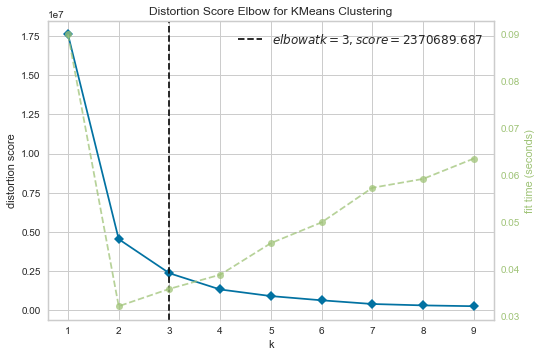

In [13]:
modelo=KMeans()
visual=KElbowVisualizer(modelo, k=(1,10))
visual.fit(X)
visual.poof();

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [14]:
single=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
single.fit(X)
y_predAgg=single.labels_

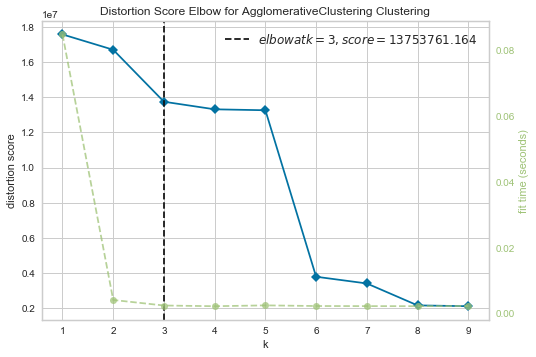

In [17]:
modelo=single
visual=KElbowVisualizer(modelo, k=(1,10))
visual.fit(X)
visual.poof();

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

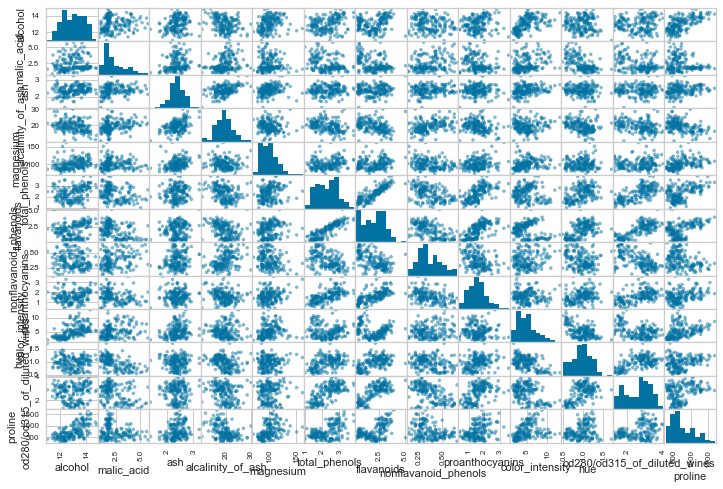

In [113]:
#https://stackoverflow.com/questions/55394041/module-pandas-has-no-attribute-scatter-matrix
scatter_matrix(X, alpha=0.5,figsize=(12,8));

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

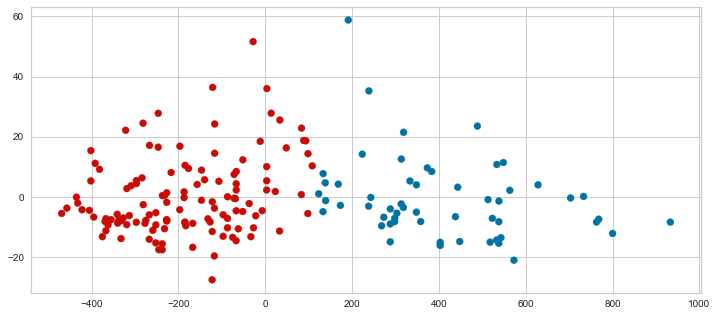

In [133]:
#https://stackoverflow.com/questions/36180477/assigning-custom-colors-to-clusters-using-numpy
pca=PCA().fit(X)
pca_x=pca.transform(X)
COLOR_MAP = {0 : 'r',1 : 'b'}

color=[COLOR_MAP[l] for l in y_pred]

fig=plt.figure(figsize=(12,8))
ax0=plt.subplot2grid((6,1), (0,0), rowspan=4)
ax0.scatter(pca_x[:,0], pca_x[:,1], c=color);

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

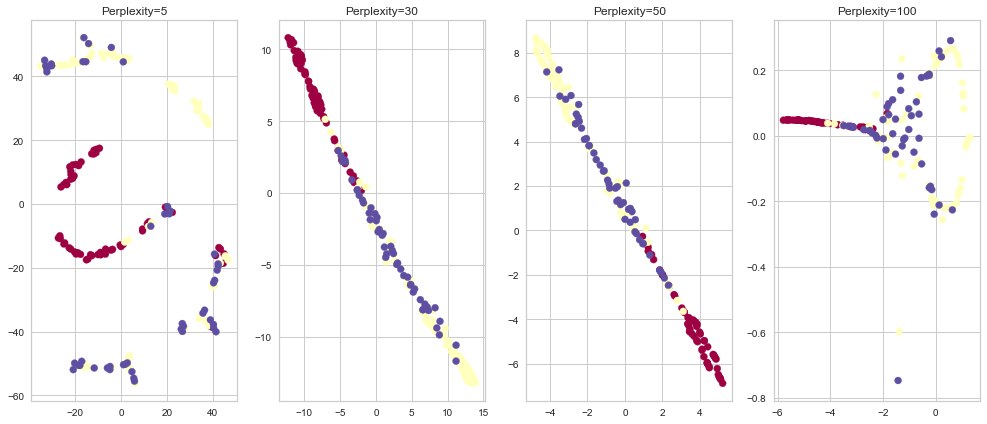

In [124]:
fig, ax=plt.subplots(1, 4, figsize=(17,7))

for i, p in enumerate([5, 30, 50, 100]):
    tsne=TSNE(perplexity=p)
    x_emb=tsne.fit_transform(X)
    ax[i].scatter(x_emb[:,0], x_emb[:,1], c=y, cmap='Spectral')
    ax[i].set_title('Perplexity={}'.format(p))
    
plt.show();